In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

from dataloader import prepare_data, create_generators, visualize_images


# Select classes and prepare data
classes = ["Angelina Jolie", "Brad Pitt", "Denzel Washington",
           "Hugh Jackman", "Jennifer Lawrence"]
prepare_data(classes)

# Create data generators
train_dir = "train_data"
test_dir = "test_data"
train_generator, test_generator = create_generators(train_dir, test_dir)

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 500 images belonging to 5 classes.
Found 366 images belonging to 5 classes.


In [2]:
# Load MobileNetV2 model with pre-trained ImageNet weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

C:\Users\sarah\AppData\Local\Temp/ipykernel_5988/843167241.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Freeze the base model
base_model.trainable = False

In [4]:
# Add custom classifier on top of MobileNetV2
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

In [5]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Define callbacks
checkpoint = ModelCheckpoint("mobilenetv2_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20


C:\Users\sarah\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4065 - loss: 1.4787
Epoch 1: val_accuracy improved from -inf to 0.79235, saving model to mobilenetv2_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 395ms/step - accuracy: 0.4101 - loss: 1.4672 - val_accuracy: 0.7923 - val_loss: 0.5472
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7431 - loss: 0.5883
Epoch 2: val_accuracy improved from 0.79235 to 0.89617, saving model to mobilenetv2_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.7443 - loss: 0.5864 - val_accuracy: 0.8962 - val_loss: 0.3215
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8758 - loss: 0.3448
Epoch 3: val_accuracy improved from 0.89617 to 0.90984, saving model to mobilenetv2_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.8755 - loss: 0.3453 - val_accuracy: 0.9098 - val_loss: 0.2458
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9467 - loss: 0.2148
Epoch 4: val_accuracy improved

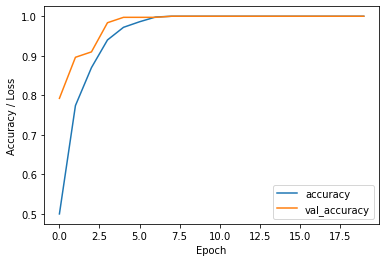

In [10]:
# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [11]:
# Save the model
model.save("mobilenetv2_model.h5")